# Group exercise 1: Evidence for dark matter

The rotation curve for the Andromeda galaxy (M31) is shown here, which historically provided some of the first key evidence for galaxies being surrounded by massive dark matter halos.

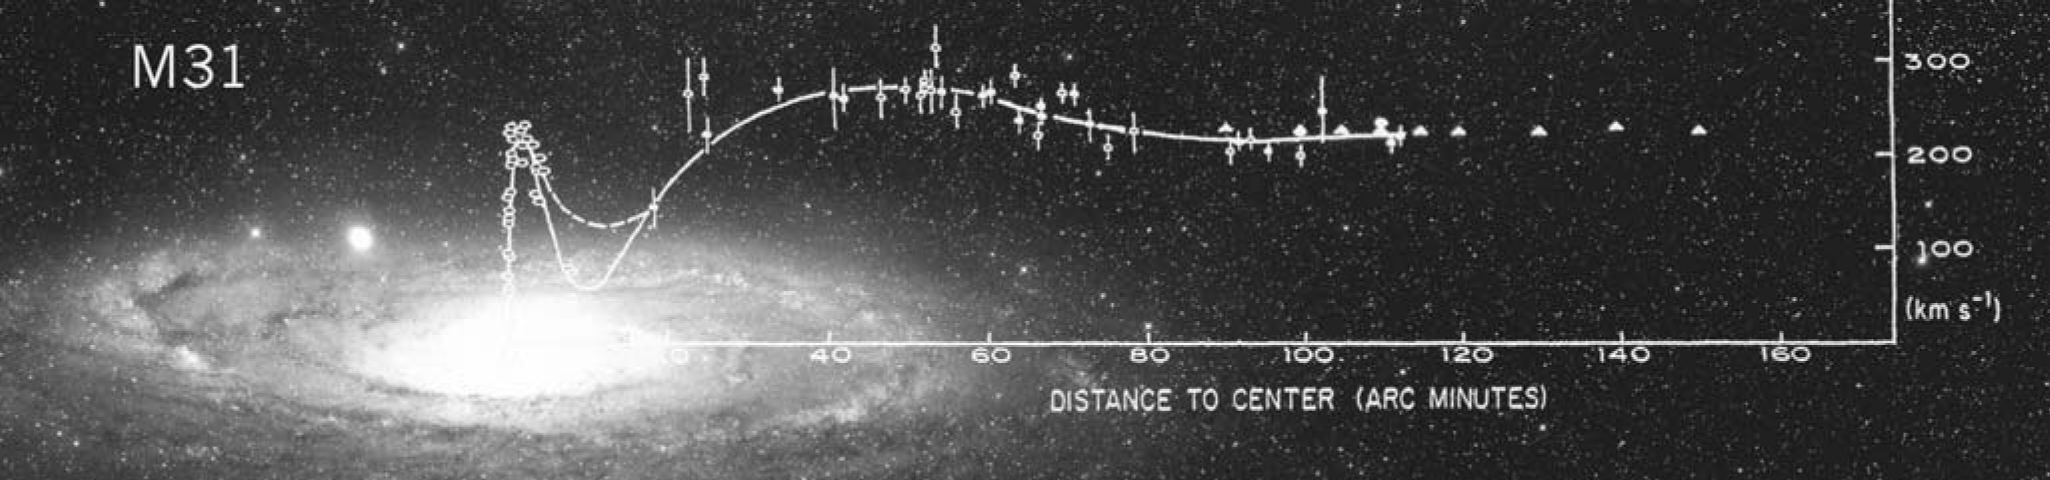

Figure credit Rubin and Dunlap, taken from [Reuben (2006)](https://physicstoday.scitation.org/doi/10.1063/1.2435662)

In this exercise, you will study the M31 rotation curve to deduce two key features of dark matter halos:
- There is more mass in dark matter than in the normal luminous matter (visible stars and gas made up of atoms).
- The dark matter is far more extended than the luminous matter, with the former dominating the latter at large distances from the center of the galaxy.

**Reading:**
- Lesson 1 - Python Basics
- Lesson 2 - Control Structures



## Part I: 

Recall for a spherically-symmetric mass distribution, the circular velocity $v$ at a measured radius $r$ is given by the formula

$$v(r) = \sqrt{\frac{G M(r)}{r}} $$

where $M(r)$ is the enclosed mass profile, denoting the amount of total mass enclosed within a sphere of radius $r$. Using the rotation curve data provided below, make an [error bar plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) of $M(r)$ as a function of $r$. 

For comparison, the total mass of baryons stars and gas is of order $10^{11} \, M_{\odot}$.

*Note about units: It is common to work in units of km/s for velocity, kiloparsecs (kpc) for distance, and solar masses ($M_\odot$) for mass. However, in the data below, as in the figure above, radius is quoted in angular scales (arcmin). To convert to physical distance (kpc), you will need to know that the distance to M31 is 770 kpc.*

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Data for rotation curve of M31 (Andromeda galaxy)
# From Carignan et al (2006) https://arxiv.org/abs/astro-ph/0603143

# Circular velocity in km/s for rotation curve
v_obs = np.array([222.1, 222.3, 224.4, 224.9, 225.6, 225.7, 226. , 226.8, 227.4, 227.5, 
                  227.6, 228.1, 229.3, 230.4, 231.1, 232. , 232.8, 235.5, 235.7, 242.9, 
                  245.5, 251. , 251.1, 251.8, 252.1, 255.1, 258.9, 262. ])

# Error in velocity (km/s) for rotation curve
v_err = np.array([ 0.7,  0.8,  1. ,  2.1,  4.6,  5.7,  6.9,  7.4, 13.8, 14.2, 17.1, 17.8, 
                  18.6, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 
                  28.8, 28.8, 28.8, 28.8])

# Radius values where each circular velocity is measured (units are arcmin)
r_obs = np.array([ 25. ,  30. ,  35. ,  40. ,  45. ,  50. ,  55. ,  60. ,  65. , 70. ,  
               75. ,  80. ,  85. ,  90. ,  94.5,  99. , 103.5, 108. , 112.5, 117. , 
              121.5, 126. , 130.5, 135. , 139.5, 144. , 148.5, 153. ])

# Useful value for Newton's constant G in units of (km/s)^2 * kpc / M_sun
G = 4.30e-6


# Our solution for Part I:

###  In this calculation, We have calculated the required measurements to be able to draw the plot for the enclosed mass profile of M31 as asked.

First since the Distance is given in Kiloparsecs, we calculated all the required measuremnets in Kiloparsecs as well.


Given : For a spherically-symmetric mass distribution, the circular velocity $v$ at a measured radius $r$ is given by the formula
$$
v(r) = \sqrt{\frac{G M(r)}{r}}
$$

where $M(r)$ is the enclosed mass profile, denoting the amount of total mass enclosed within a sphere of radius $r$.


 The expression for the enclosed mass
$$
M(r) = \frac{v^2 r}{G}
$$
 Since $M$ depends on $v$ and $r$, and assuming $G$ has no uncertainty, the error in mass, $\Delta M$, is given by
$$
\Delta M = \left| \frac{\partial M}{\partial v} \right| \Delta v + \left| \frac{\partial M}{\partial r} \right| \Delta r
$$

Assuming only velocity errors are significant (as is typical in many astronomy problems), the dominant part of the error propagation would be
$$
\Delta M \approx \frac{2 v r}{G} \Delta v
$$

Now using the rotation curve data provided to us, the plot for the error bars of $M(r)$ as a function of $r$ is  created. 



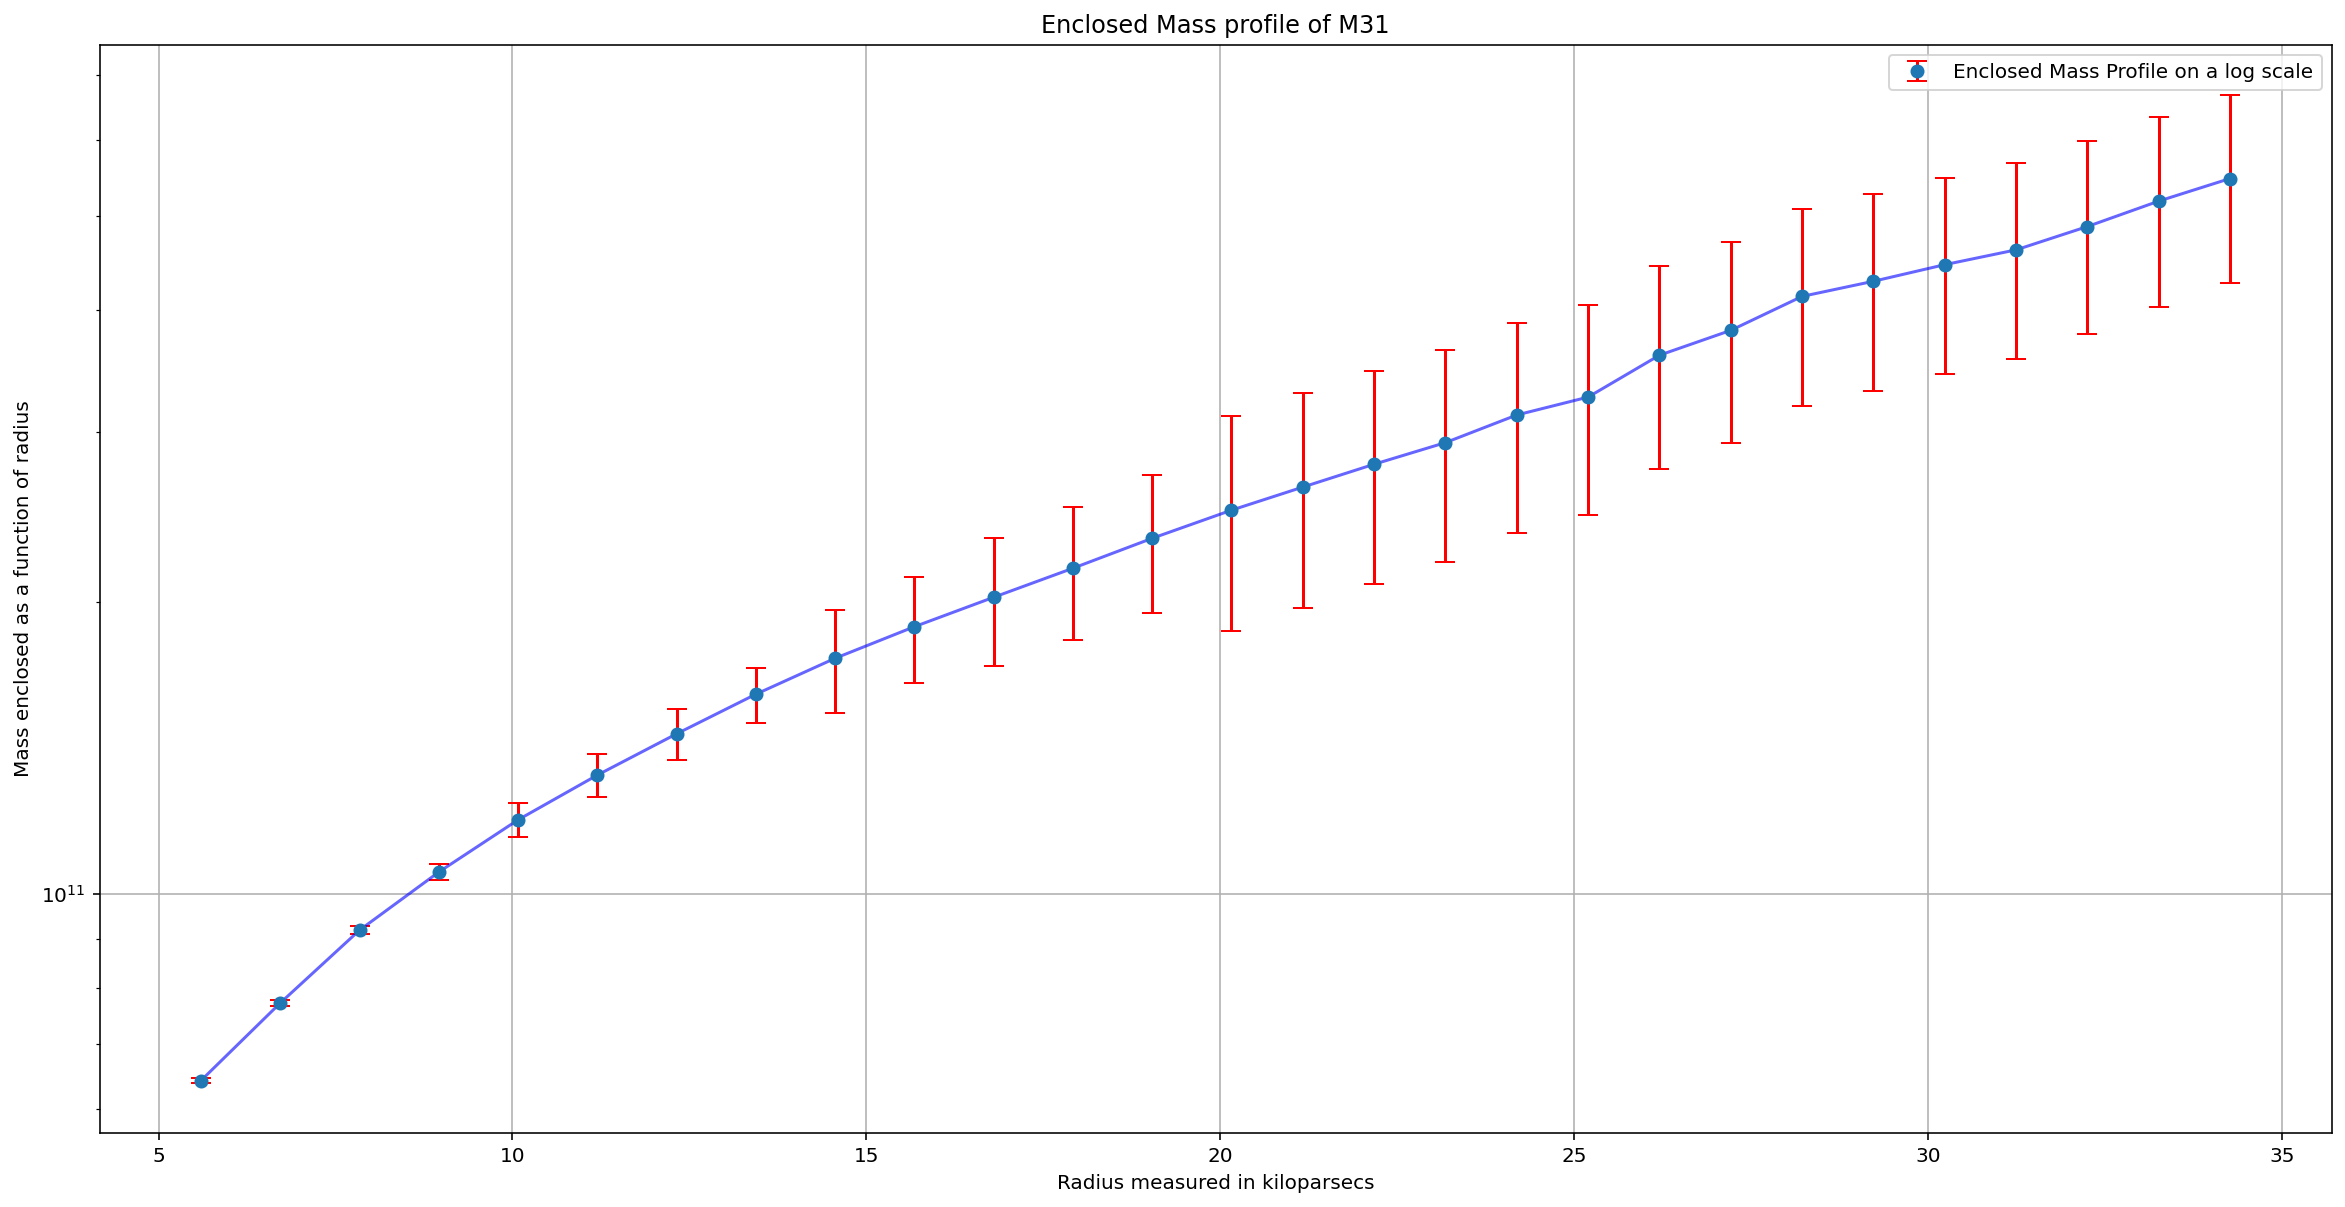

In [65]:
distance_M31 = 770
radius_converted = (r_obs * np.pi/ 10800) * distance_M31
enclosed_mass = (v_obs**2 * radius_converted) / G
m_err = 2 * v_obs * radius_converted / G * v_err
plt.figure(figsize=(20, 10))
plt.errorbar(radius_converted,
             enclosed_mass,
             yerr=m_err,
             fmt='o',
             ecolor='r',
             capsize=5,
             label='Enclosed Mass Profile on a log scale')
plt.plot(radius_converted,
         enclosed_mass,
         linestyle='-',
         color='b',
         alpha=0.6)
plt.xlabel("Radius measured in kiloparsecs")
plt.ylabel("Mass enclosed as a function of radius")
plt.title("Enclosed Mass profile of M31")
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

## Part II:

Here we try to model the M31 rotation curve. For the luminous matter, we divide up the baryons into two components:

- Stellar bulge: the dense clump of stars in the center of the galaxy.
- Stellar disk: the disk of stars, which is more extended than the bulge.

We assume that the enclosed mass profile for the bulge takes the form

$$M_{\rm bulge}(r) = \frac{M_b r^2}{(r + a_{b})^2}$$

where $M_b = 2.0 \times 10^{10} \; M_\odot$ is the total bulge mass and $a_b = 2 \; {\rm arcmin}$ is the characteristic size of the bulge. For the purposes of this exercise, we also assume that the disk takes a similar parametric form as the bulge

$$M_{\rm disk}(r) = \frac{M_d r^2}{(r + a_{d})^2}$$

with a disk mass $M_{d} = 1.4 \times 10^{11} \; M_\odot$ and larger size $a_d = 25 \; {\rm arcmin}$.
(This is a bit of a "spherical cow" approximation, which we take for simplicity. Mass is not distributed in a spherically-symmetric fashion for a disk.)

Lastly, we have a dark matter halo. The Navarro-Frenk-White (NFW) profile has been proposed to describe the universal structure of all dark matter halos. The NFW enclosed mass profile is

$$M_{\rm NFW}(r) = 4 \pi \rho_s r_s^3 \left( \ln(1 + r/r_s) - \frac{r}{r + r_s} \right) \, , $$

where $\rho_s$ and $r_s$ are constants. This follows by integrating the NFW density profile $M_{\rm NFW}(r) = \int^r_0 d^3 r^\prime \, \rho_{\rm NFW}(r^\prime)$.
It turns out that the dark matter halo is so large that we can approximately treat $r_s$ as being much larger than the $r$ values for the rotation curve. In that limit, we have

$$M_{\rm halo}(r) \approx A r^2$$

where $A = 2\pi \rho_s r_s$.

Your tasks are as follows:

- Given the inputs described above, determine the best value of $A$ to fit the data.
- Plot the ratios
$$\frac{M_{\rm halo}(r)}{M_{\rm tot}(r)} , \quad \frac{M_{\rm baryons}(r)}{M_{\rm tot}(r)}$$
showing the relative mass fractions for dark matter vs baryons for the range of radii $[0,153 \; {\rm arcmin}]$, using your best fit value of $A$.



# Our solution to Part II:

This code takes data from the Andromeda galaxy (M31) and models how its mass is distributed. It splits the mass into three parts: the bulge, the disk, and a dark matter halo. The bulge and disk are modeled using simple formulas that are provided to us, while the dark matter halo is approximated with a parameter \( A \). Using `curve_fit`, the code finds and prints the best value of \( A \) that makes the total mass match the observed rotation curve of M31.

### why the curve fit? 

We use `curve_fit` to help find the best value for the parameter \( A \), which represents the dark matter in the Andromeda galaxy. By adjusting \( A \), `curve_fit` makes our model match the observed rotation speed of the galaxy as closely as possible. This helps us understand how much dark matter is present and how it affects the galaxy's mass.

### A is a parameter what is it?

After looking at the Given equations, I think the value of \( A \) represents how strong the effect of dark matter is in the Andromeda galaxy. It helps describe how much dark matter there is and how it is spread out across the galaxy. The higher the value of \( A \), the more dark matter there seems to be. By fitting this value to the data, we can better understand how dark matter affects the galaxy's overall rotation and mass distribution, even though we can't directly see it.

`A_best = popt[0] ` is used because curve fit returns an array popt acooring to `sciPy.optimize` {https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html} . And for us `curve_fit` is trying to fit A as a single parameter such that popt[] only has one element.  Since there is only one element popt[0], optimizes and gives us what we want.




We have tried conversion of Arcmin to degrees and as well as Rads, A best fit value is unchanged.

In [66]:
from scipy.optimize import curve_fit

distance_M31 = 770
radius_converted = (r_obs / 60) * distance_M31
enclosed_mass = (v_obs**2 * radius_converted) / G
M_b = 2.0e10  # Mass of buldge in solar masses
a_b = 2 / 60 * distance_M31  # Size converted from arc mins
M_d = 1.4e11  # Mass of disk in solar mass
a_d = 25 / 60 * distance_M31  # Size converted to Kiloparsecs


def Mass_profile_buldge(M_b, r, a_b):
    return M_b * r**2 / (r + a_b)**2


def Mass_profile_disk(M_d, r, a_d):
    return M_d * r**2 / (r + a_d)**2


def Mass_profile_halo(A, r):
    return A * r**2


def Mass_profile_total_mass(r, A):
    return Mass_profile_buldge(
        M_b, r, a_b) + M_d * r**2 / (r + a_d)**2 + Mass_profile_halo(A, r)


def expectd_velocity(A, r):
    return np.sqrt(G * Mass_profile_total_mass(r, A) / r)


popt, _ = curve_fit(expectd_velocity, radius_converted, v_obs, sigma=v_err)
A_best = popt[0]
print(f"Best fit value of A: {A_best:.5e}")

Best fit value of A: 3.59310e+01


###  This code block calculates all the profiles by giving proper inputs taken either from calculations or data provided.

In [67]:
Mass_bulge_profile = Mass_profile_buldge(M_b, radius_converted, a_b)
Mass_disk_profile = Mass_profile_disk(M_d, radius_converted, a_d)
Mass_halo_profile = Mass_profile_halo(A_best, radius_converted)
Mass_tot_profile = Mass_bulge_profile + Mass_disk_profile + Mass_halo_profile

### This code block just calculates the relative Mass profiles

In [68]:
Mass_halo_ratio = Mass_halo_profile / Mass_tot_profile
Mass_baryons_ratio = (Mass_bulge_profile + Mass_disk_profile) / Mass_tot_profile

# Plotting the ratios a function of radius

###  Plot for the Ratio of the halo Mass vs radius

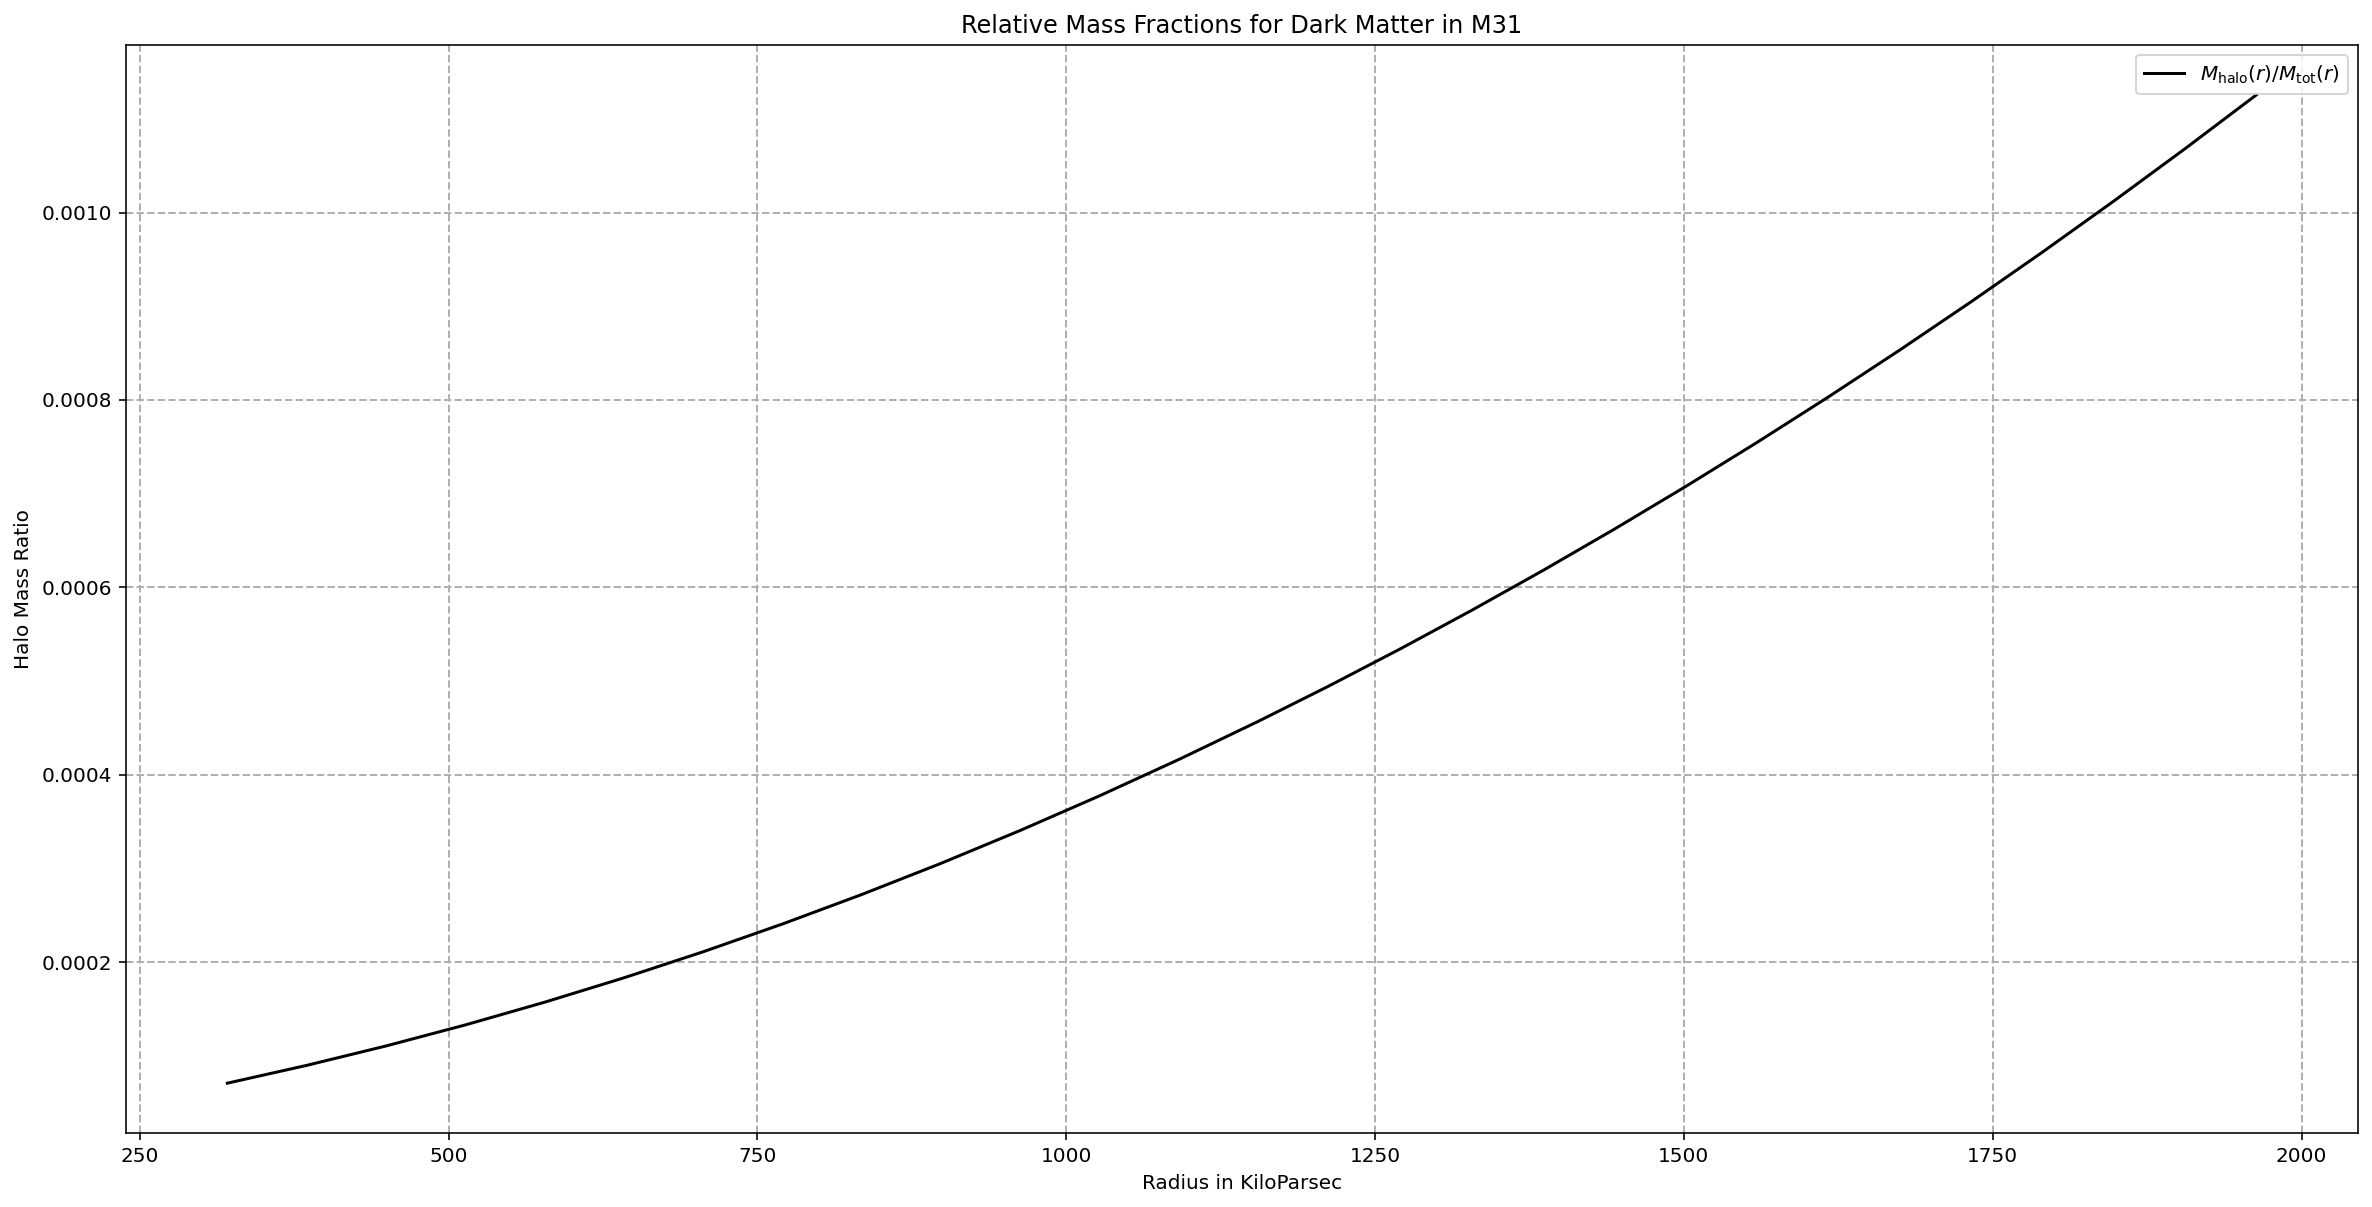

In [69]:
plt.figure(figsize=(20, 10))
plt.plot(radius_converted, Mass_halo_ratio, label=r'$M_{\rm halo}(r) / M_{\rm tot}(r)$', color='black')
plt.xlabel('Radius in KiloParsec')
plt.ylabel('Halo Mass Ratio')
plt.title('Relative Mass Fractions for Dark Matter in M31')
plt.legend()
plt.grid(True, linestyle='--', linewidth=1)
plt.show()

###  Plot for the Ratio of the Baryonic Mass vs radius

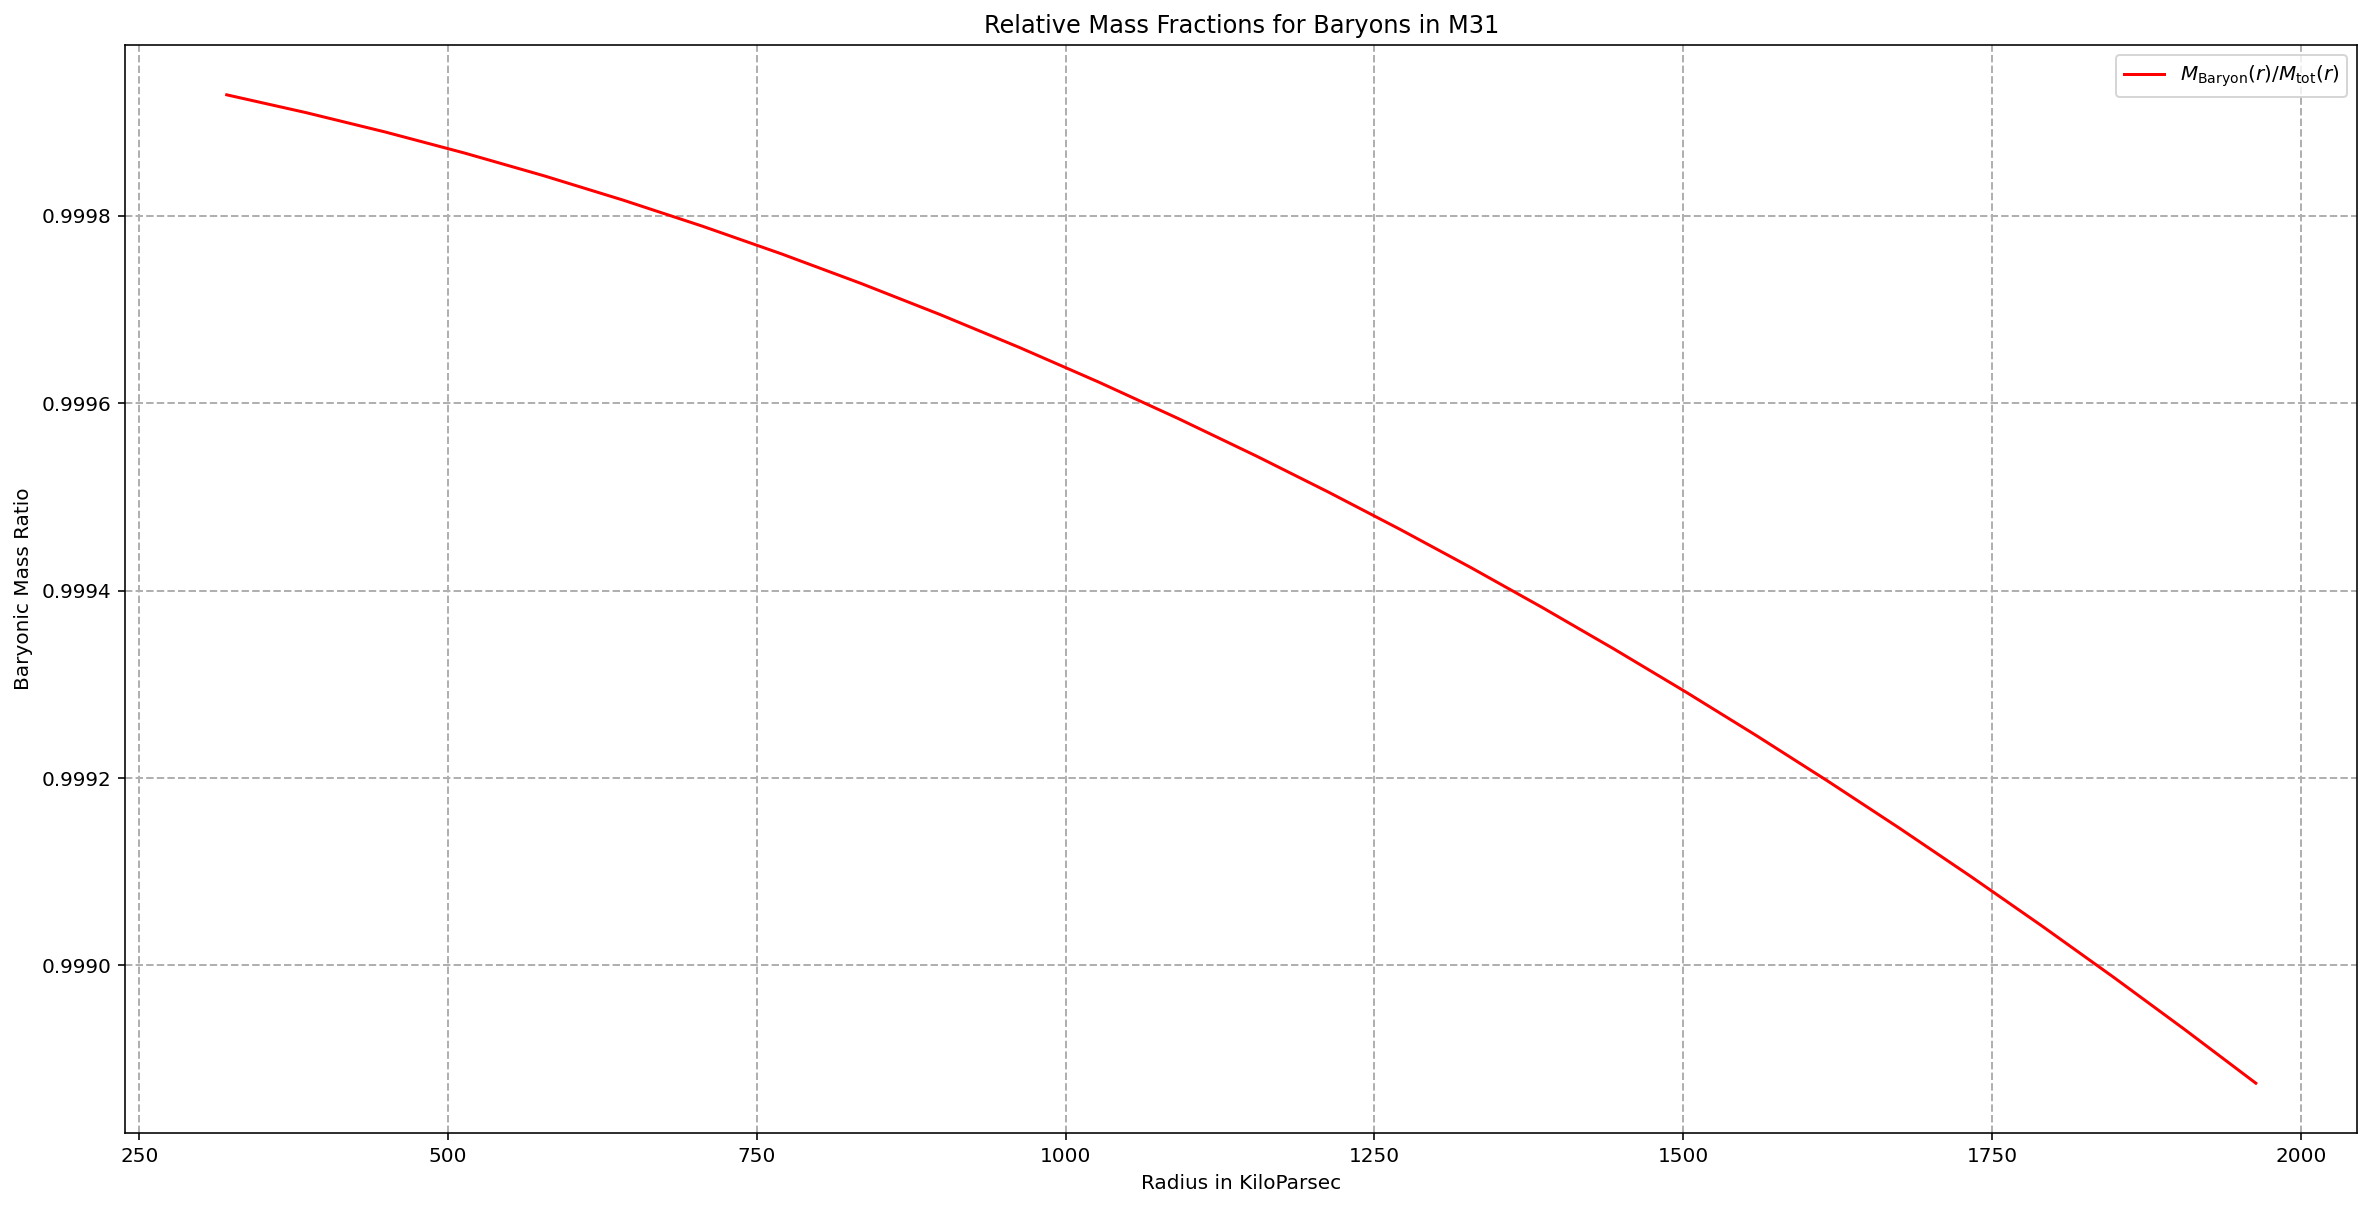

In [70]:
plt.figure(figsize=(20, 10))
plt.plot(radius_converted, Mass_baryons_ratio, label=r'$M_{\rm Baryon}(r) / M_{\rm tot}(r)$', color='red')
plt.xlabel('Radius in KiloParsec')
plt.ylabel('Baryonic Mass Ratio')
plt.title('Relative Mass Fractions for Baryons in M31')
plt.legend()
plt.grid(True, linestyle='--', linewidth=1)
plt.show()

## Combined graph

### This plot shows the difference in scales both ratios. So now we have to be carefull about it and write our code in a different way.

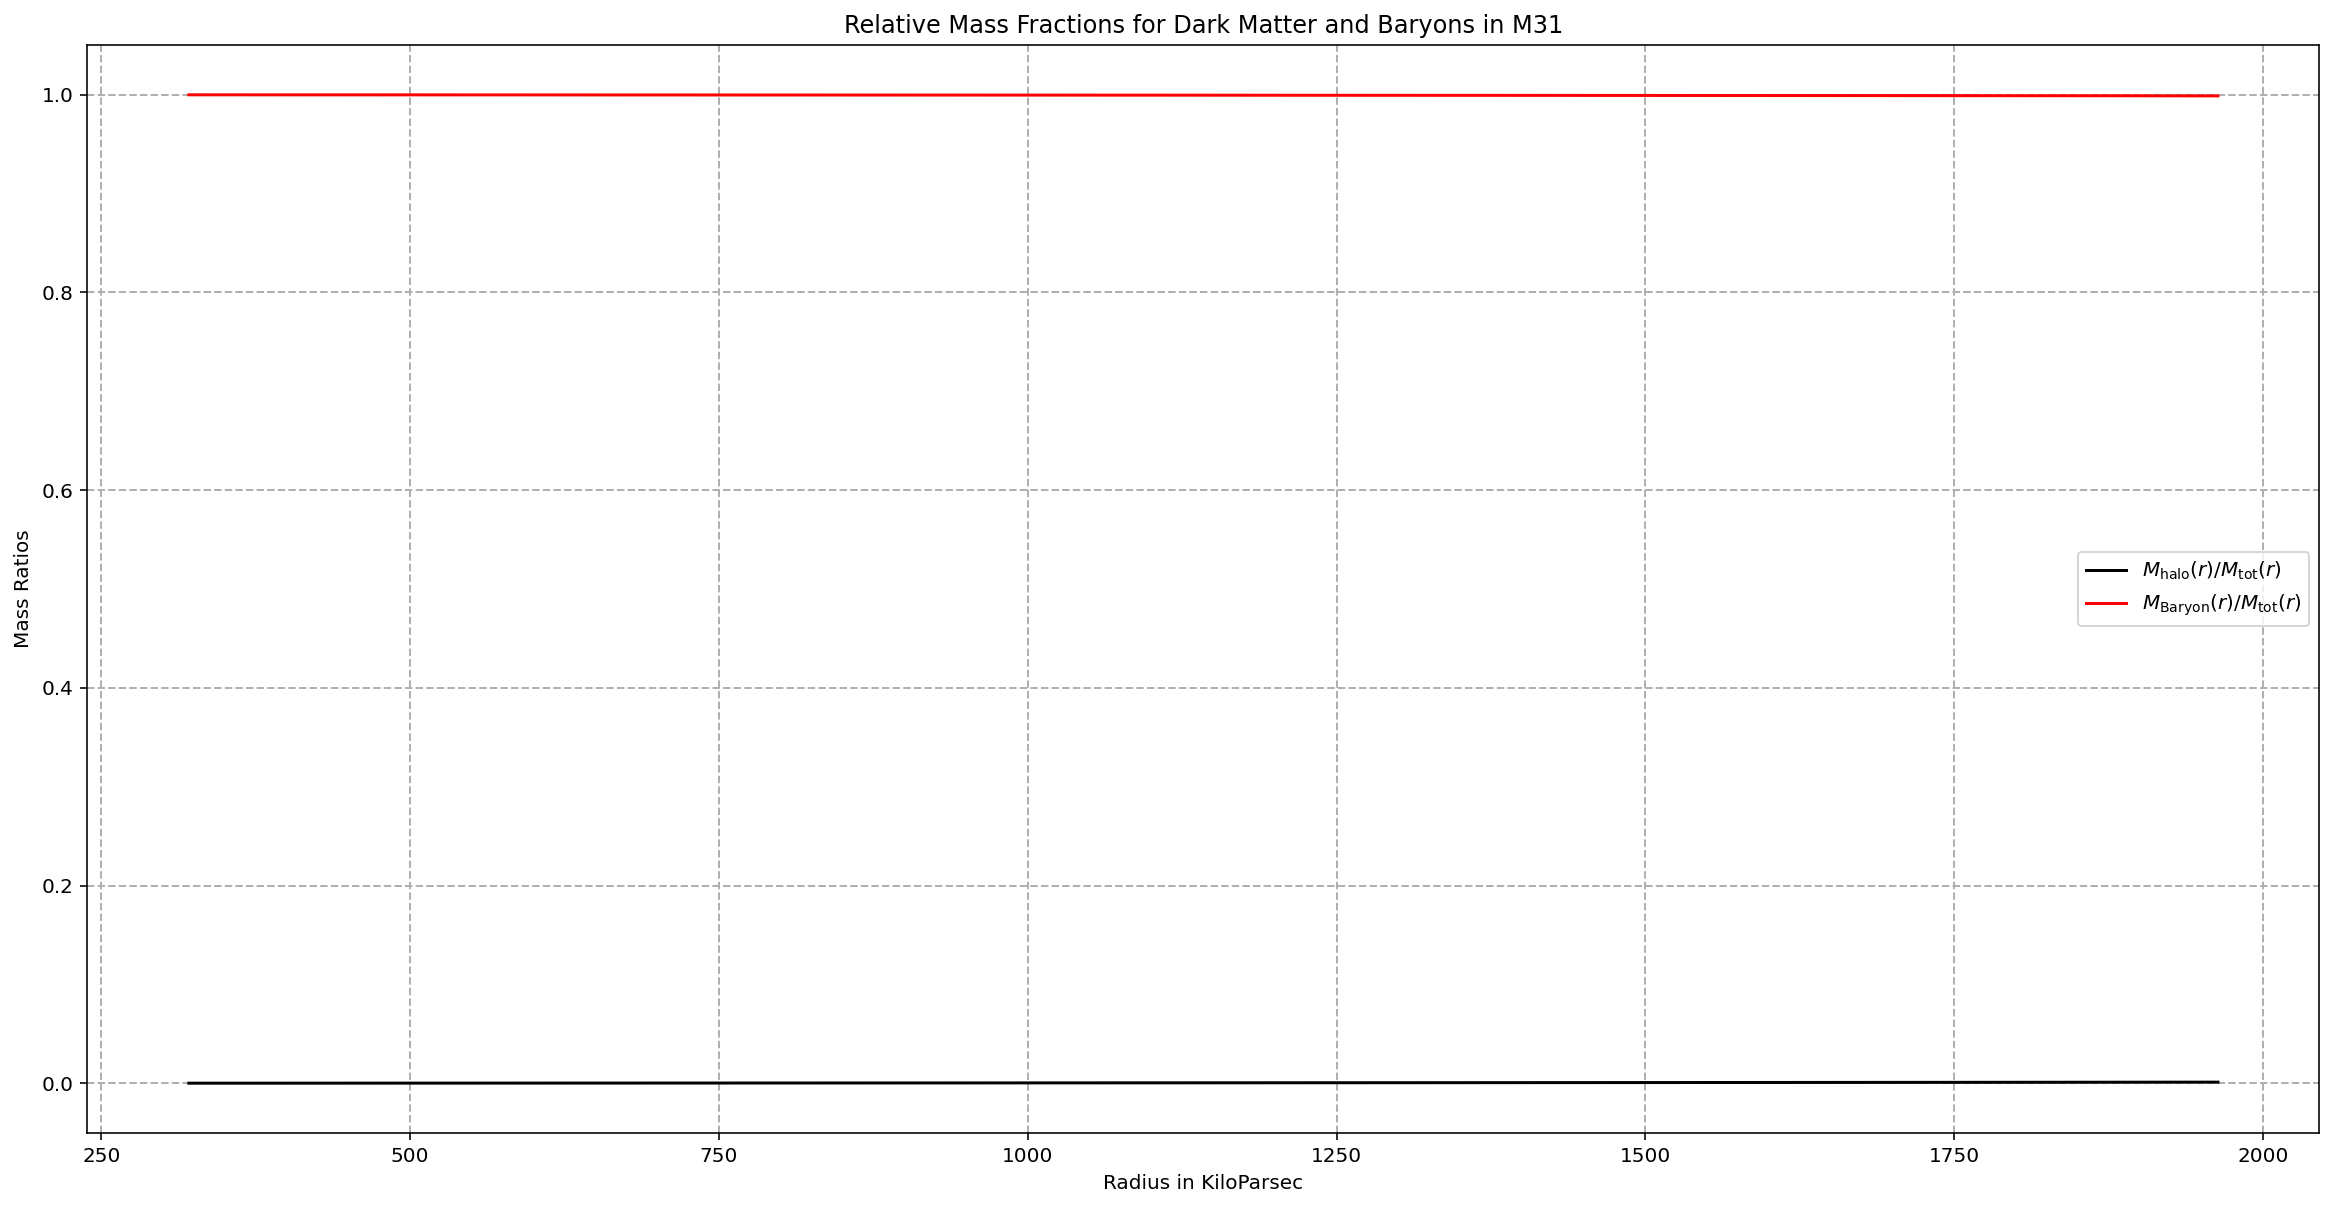

In [71]:
plt.figure(figsize=(20, 10))
plt.plot(radius_converted, Mass_halo_ratio, label=r'$M_{\rm halo}(r) / M_{\rm tot}(r)$', color='black')
plt.plot(radius_converted, Mass_baryons_ratio, label=r'$M_{\rm Baryon}(r) / M_{\rm tot}(r)$', color='red')
plt.xlabel('Radius in KiloParsec')
plt.ylabel('Mass Ratios')
plt.title('Relative Mass Fractions for Dark Matter and Baryons in M31')
plt.legend()
plt.grid(True, linestyle='--', linewidth=1)
plt.show()

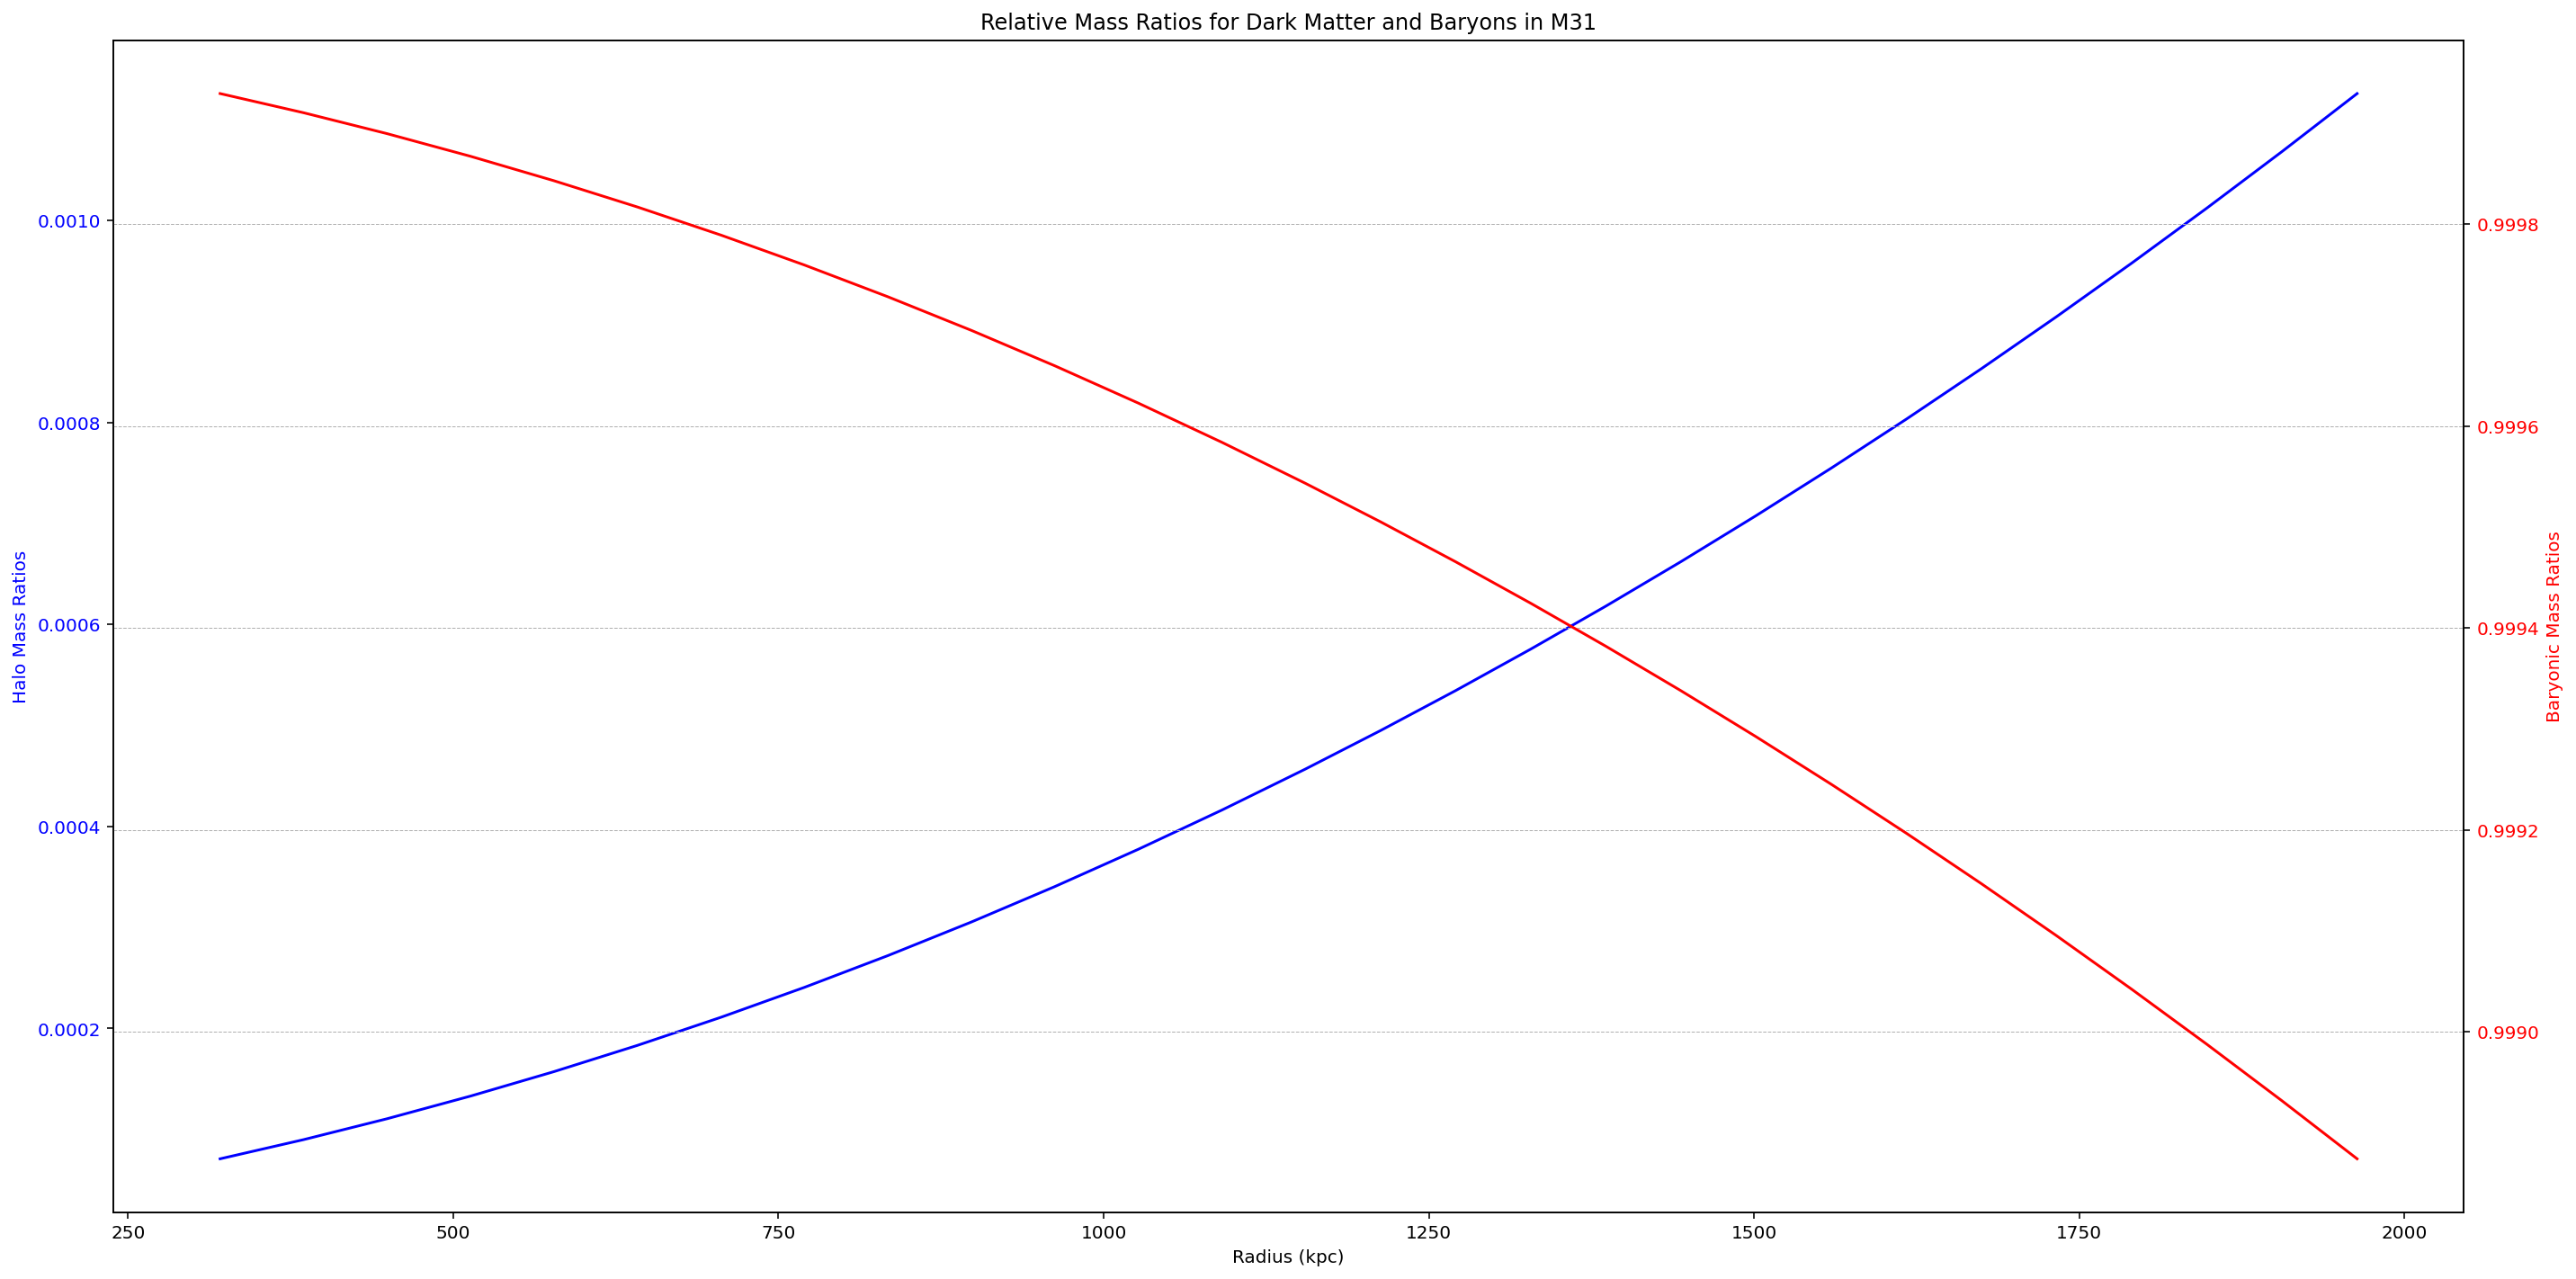

In [72]:
def combined_plot(radius_converted,Mass_halo_ratio,Mass_baryons_ratio):
    fig, ax1 = plt.subplots(figsize=(20, 10))


    ax1.plot(radius_converted, Mass_halo_ratio, color='b', label=r'$M_{\rm halo}(r) / M_{\rm tot}(r)$')
    ax1.set_xlabel('Radius (kpc)')
    ax1.set_ylabel('Halo Mass Ratios', color='b')
    ax1.tick_params(axis='y', labelcolor='b')


    ax2 = ax1.twinx()
    ax2.plot(radius_converted, Mass_baryons_ratio, color='r', label=r'$M_{\rm baryons}(r) / M_{\rm tot}(r)$')
    ax2.set_ylabel('Baryonic Mass Ratios', color='r')
    ax2.tick_params(axis='y', labelcolor='r')


    plt.title('Relative Mass Ratios for Dark Matter and Baryons in M31')
    fig.tight_layout()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()
combined_plot(radius_converted,Mass_halo_ratio,Mass_baryons_ratio)

To convert $153$ arcminutes to kiloparsecs, use the following formula:

$$
\text{radius in kpc} = \left( \frac{r_{\text{arcmin}}}{60} \right) \times d_{\text{M31}}
$$

Where:
- $r_{\text{arcmin}}$ is the radius in arcminutes.
- $d_{\text{M31}} = 770 \, \text{kpc}$ is the distance to M31.

Plugging in $r_{\text{arcmin}} = 153$:

$$
\text{radius in kpc} = \left( \frac{153}{60} \right) \times 770 \approx 1964.5 \, \text{kpc}
$$

So, $153$ arcminutes is approximately $1964.5 \, \text{kpc}$.

As you can see our fraction is infact with in the given range for radius [0, 153 arcmins]
